In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, confusion_matrix

In [3]:
df = pd.read_csv("C:/MIT/3rd semester/IDAP/SalesKaggle3.csv")
print (df.shape)
print (df.columns)
df.head()

(198917, 14)
Index(['Order', 'File_Type', 'SKU_number', 'SoldFlag', 'SoldCount',
       'MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice'],
      dtype='object')


,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198917 non-null  int64  
 1   File_Type         198917 non-null  object 
 2   SKU_number        198917 non-null  int64  
 3   SoldFlag          75996 non-null   float64
 4   SoldCount         75996 non-null   float64
 5   MarketingType     198917 non-null  object 
 6   ReleaseNumber     198917 non-null  int64  
 7   New_Release_Flag  198917 non-null  int64  
 8   StrengthFactor    198917 non-null  float64
 9   PriceReg          198917 non-null  float64
 10  ReleaseYear       198917 non-null  int64  
 11  ItemCount         198917 non-null  int64  
 12  LowUserPrice      198917 non-null  float64
 13  LowNetPrice       198917 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


In [5]:
# we can get detailed description of all the data like mean, standard deviation etc of the data using describe
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Order,198917.0,1.064835e+05,6.013672e+04,2.000,55665.0000,108569.00,158298.00,208027.00
SKU_number,198917.0,8.613626e+05,8.699794e+05,50001.000,217252.0000,612208.00,904751.00,3960788.00
SoldFlag,75996.0,1.710090e-01,3.765193e-01,0.000,0.0000,0.00,0.00,1.00
SoldCount,75996.0,3.223064e-01,1.168615e+00,0.000,0.0000,0.00,0.00,73.00
ReleaseNumber,198917.0,3.412202e+00,3.864243e+00,0.000,1.0000,2.00,5.00,99.00
New_Release_Flag,198917.0,6.422478e-01,4.793399e-01,0.000,0.0000,1.00,1.00,1.00
StrengthFactor,198917.0,1.117115e+06,1.522090e+06,6.275,161418.7675,582224.00,1430083.00,17384454.00
PriceReg,198917.0,9.089524e+01,8.673637e+01,0.000,42.0000,69.95,116.00,12671.48
ReleaseYear,198917.0,2.006016e+03,9.158331e+00,0.000,2003.0000,2007.00,2011.00,2018.00
ItemCount,198917.0,4.142628e+01,3.754121e+01,0.000,21.0000,32.00,50.00,2542.00


In [6]:
100*df.isna().sum()/df.shape[0]

Order                0.000000
File_Type            0.000000
SKU_number           0.000000
SoldFlag            61.795121
SoldCount           61.795121
MarketingType        0.000000
ReleaseNumber        0.000000
New_Release_Flag     0.000000
StrengthFactor       0.000000
PriceReg             0.000000
ReleaseYear          0.000000
ItemCount            0.000000
LowUserPrice         0.000000
LowNetPrice          0.000000
dtype: float64

In [7]:
str_fields = ['Order', 'SKU_number', 'ReleaseYear']
for i in str_fields :
    df[i] = df[i].astype(str)

# here we are dividing the fields into categorical and numerical data
categ_cols = ['ReleaseYear', 'File_Type', 'MarketingType', 'ReleaseNumber', 'New_Release_Flag','SoldFlag']
numec_data = ['SoldCount', 'ReleaseNumber', 'StrengthFactor', 'PriceReg', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

In [8]:
df['Order'].unique().shape, df['SKU_number'].unique().shape

((198917,), (133360,))

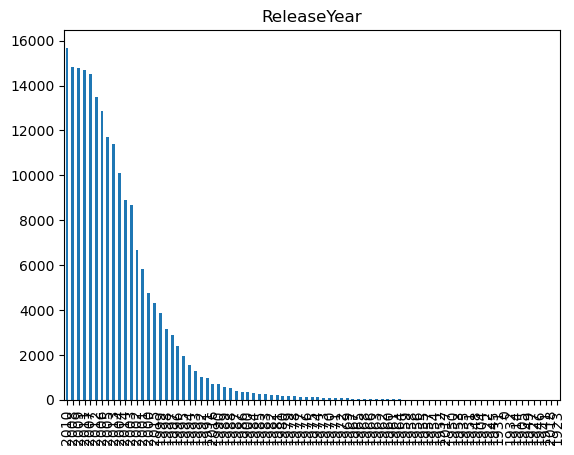

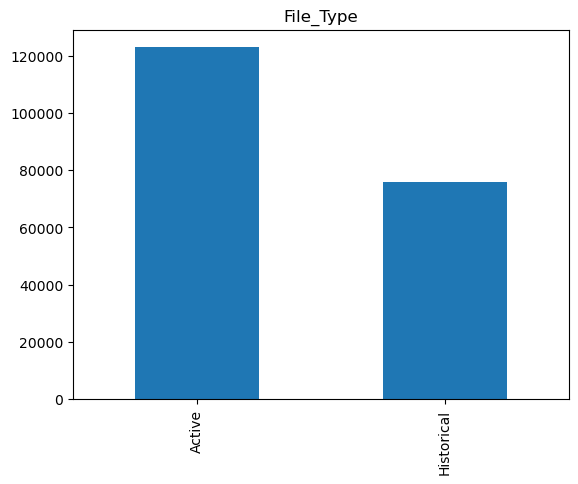

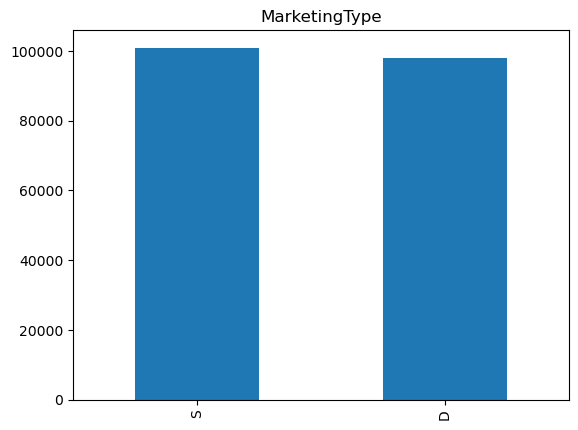

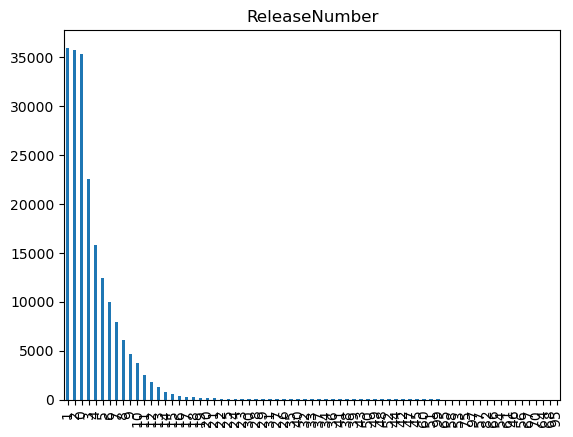

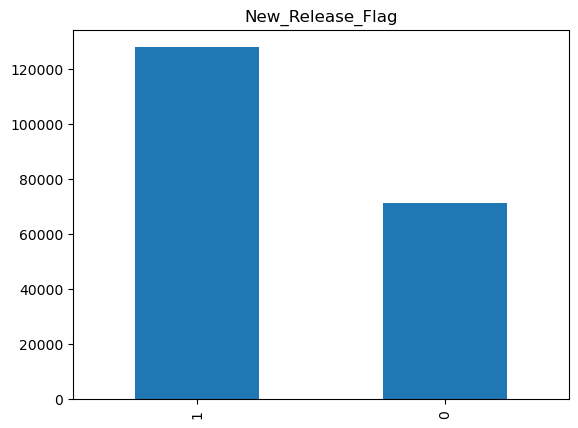

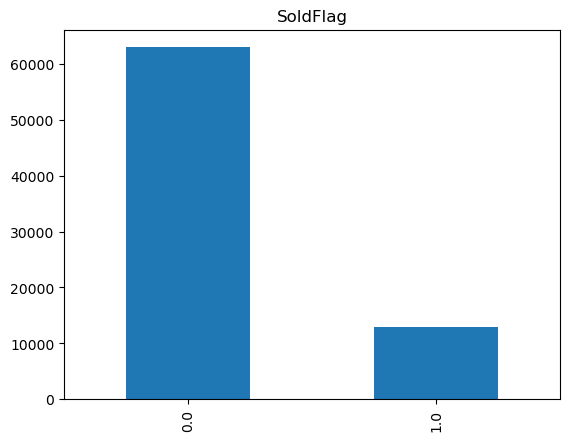

In [9]:
# plot bar charts for the categorical fields
for i in categ_cols :
    df[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()

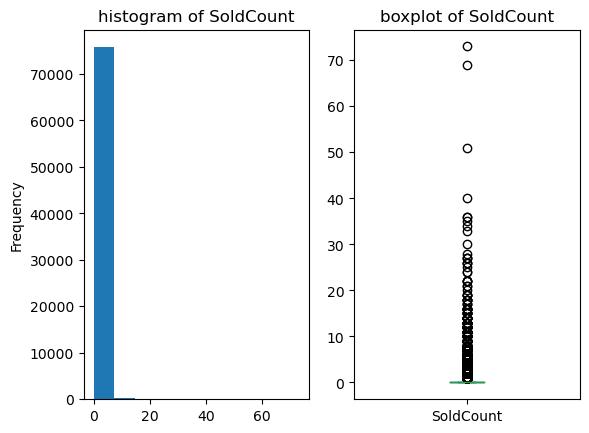

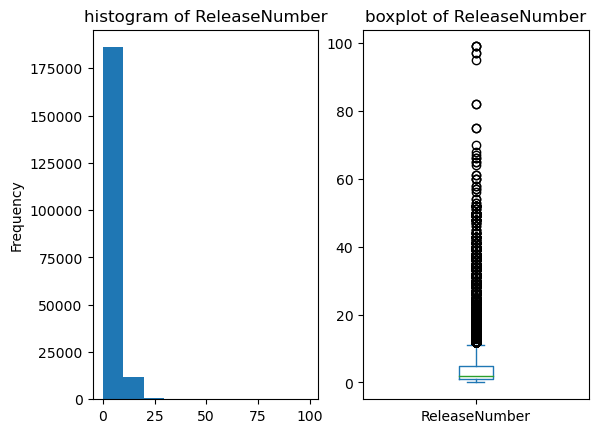

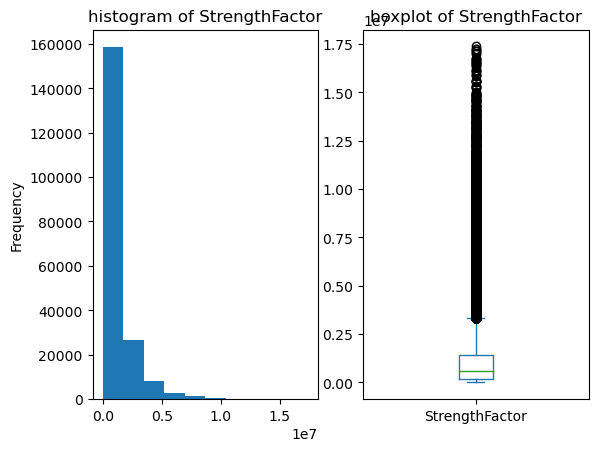

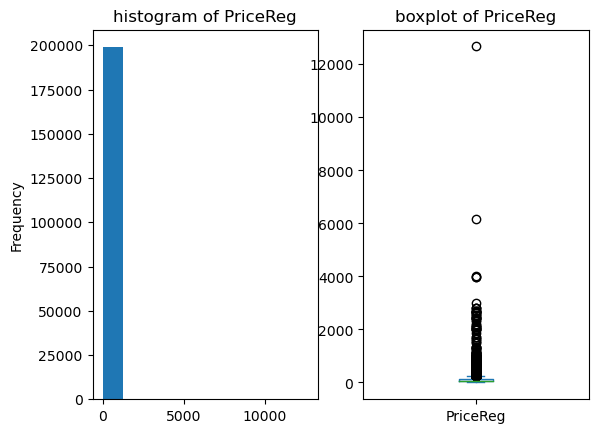

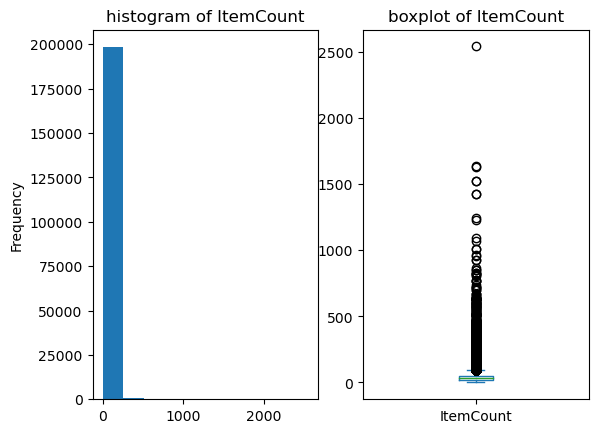

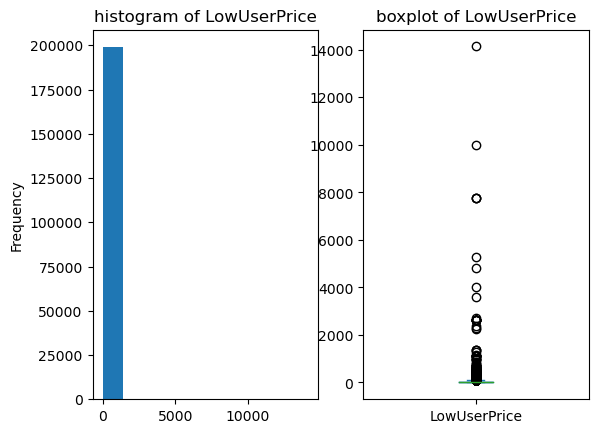

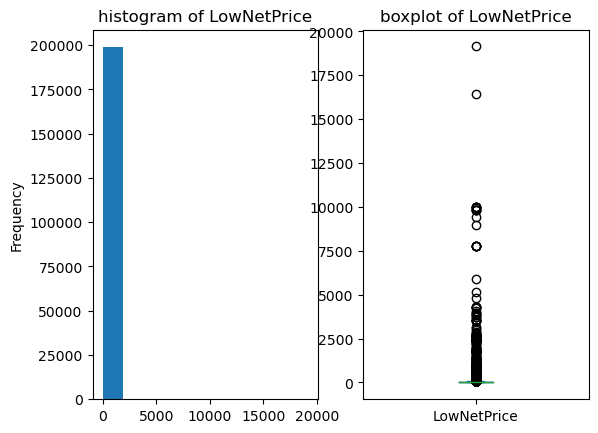

In [11]:
## plot distribution and box plots on numerical fields on the entire data
for i in numec_data : 
    _,ax = plt.subplots(1,2)
    df[i].plot(kind='hist',ax=ax[0])
    df[i].plot(kind='box',ax=ax[1])
    ax[0].set_title("histogram of "+i)
    ax[1].set_title("boxplot of "+i)
    plt.show()

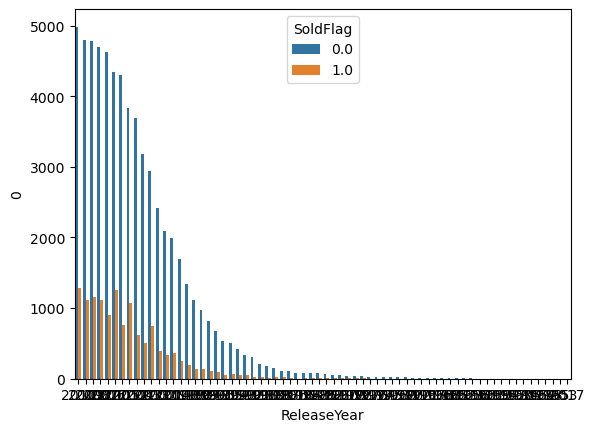

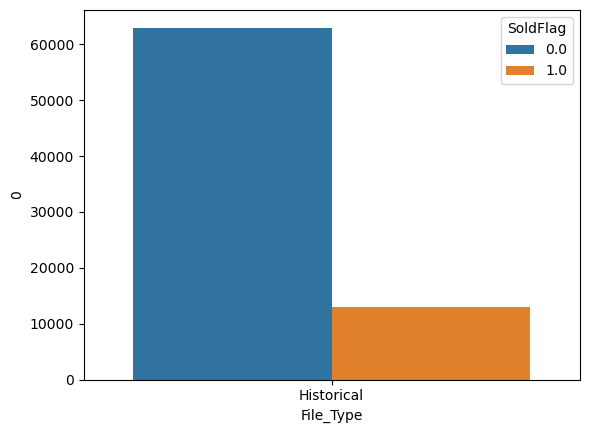

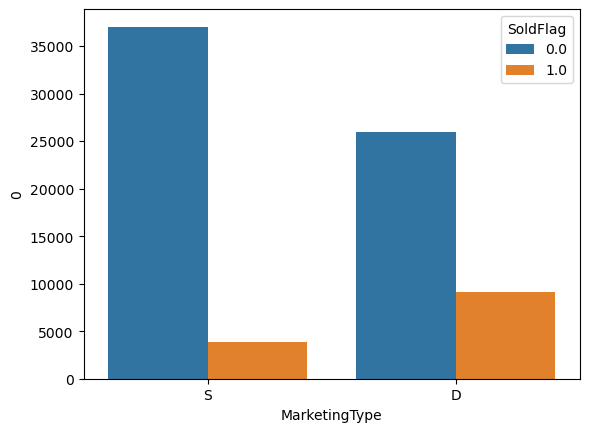

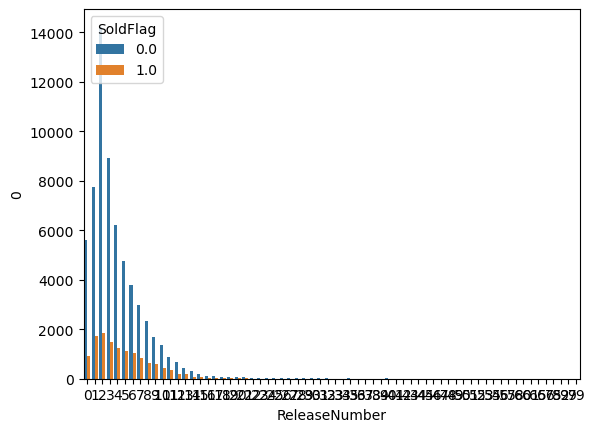

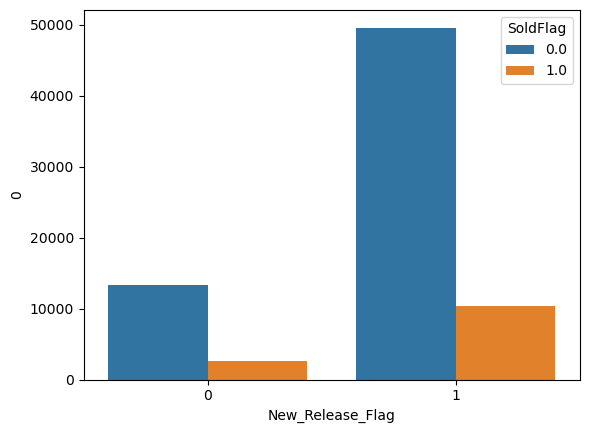

In [12]:
# plotting the distributions category wise based on the target.
target = 'SoldFlag'
for i in categ_cols : 
    if i != target :
        temp = df.value_counts([i,target]).reset_index()
        sns.barplot(data=temp,x=i,y=0,hue=target)
        plt.xticks()
        plt.show()

In [13]:
print (df[df['File_Type']=='Historical']['SoldFlag'].unique())
print (df[df['File_Type']=='Active']['SoldFlag'].unique())
print (df[df['File_Type']=='Historical']['SoldCount'].unique())
print (df[df['File_Type']=='Active']['SoldCount'].unique())
print (df['File_Type'].value_counts())
common_prods = set(df[df['File_Type']=='Active']['SKU_number'].unique()).intersection(set(df[df['File_Type']=='Historical']['SKU_number'].unique()))
print (len(common_prods))

[0. 1.]
[nan]
[ 0.  1.  2.  3.  4.  5.  7.  8. 12. 11.  6. 10. 16.  9. 35. 17. 73. 51.
 13. 20. 19. 15. 14. 69. 34. 22. 21. 24. 18. 36. 26. 28. 27. 33. 25. 40.
 30.]
[nan]
Active        122921
Historical     75996
Name: File_Type, dtype: int64
65557


(75996, 14)


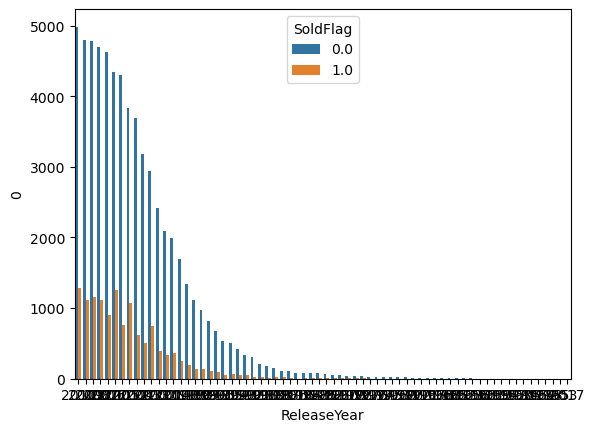

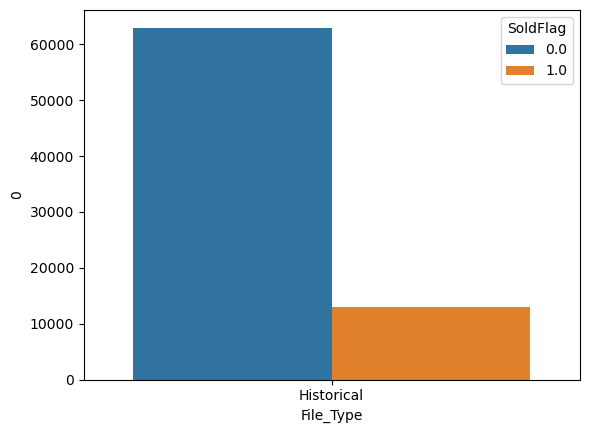

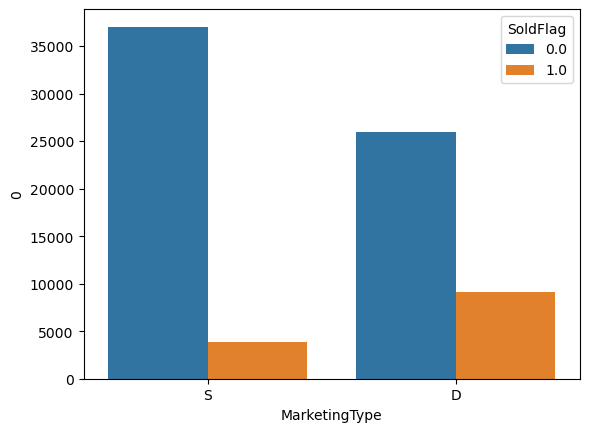

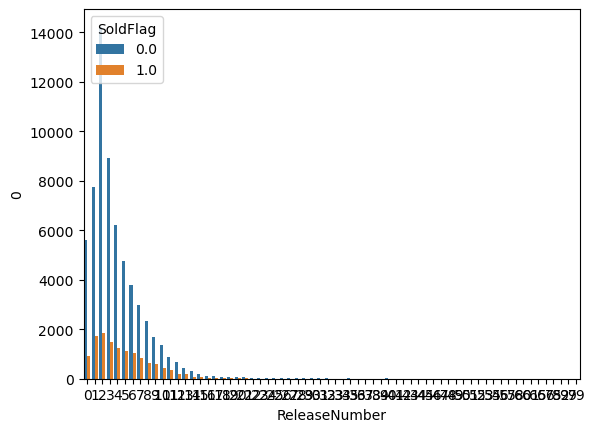

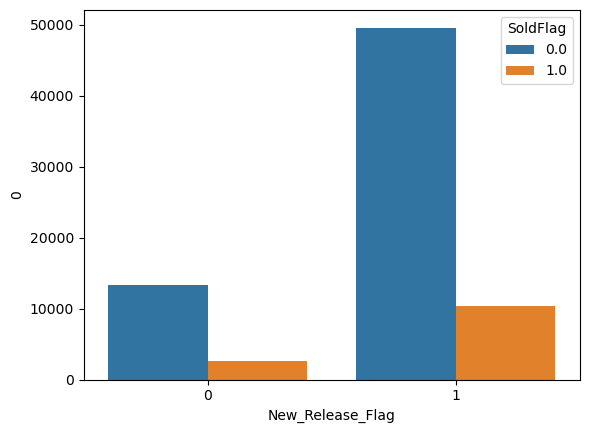

In [14]:
train = df[df['File_Type']=='Historical'].copy()
print (train.shape)
for i in categ_cols : 
    if i != target :
        temp = train.value_counts([i,target]).reset_index()
        sns.barplot(data=temp, x=i,y=0,hue=target)
        plt.xticks()
        plt.show()

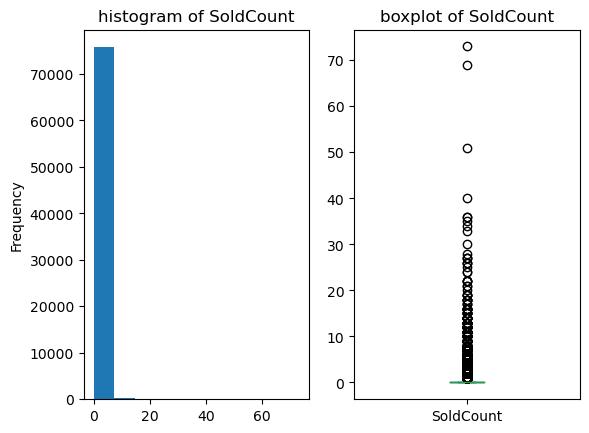

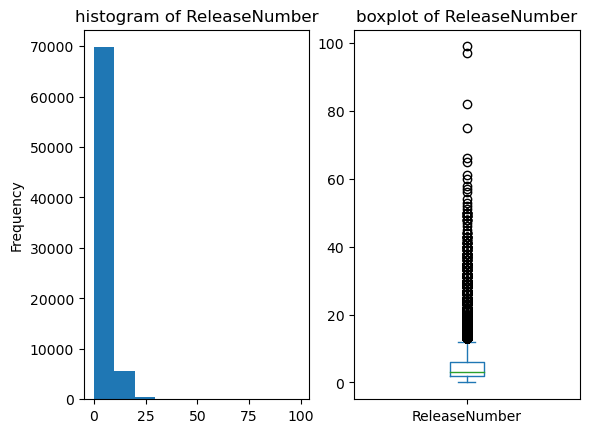

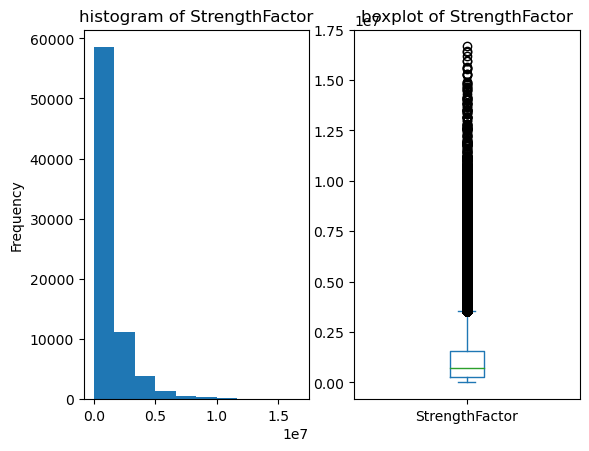

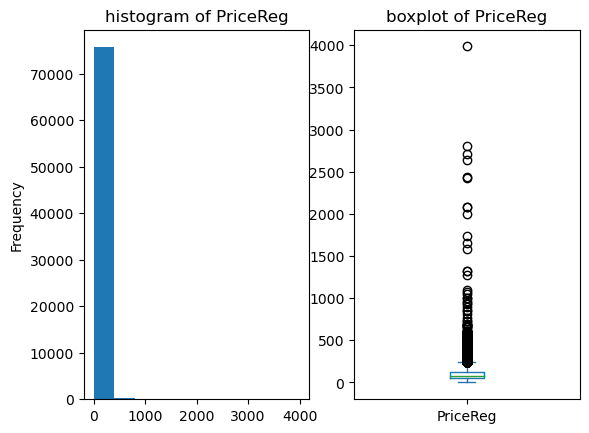

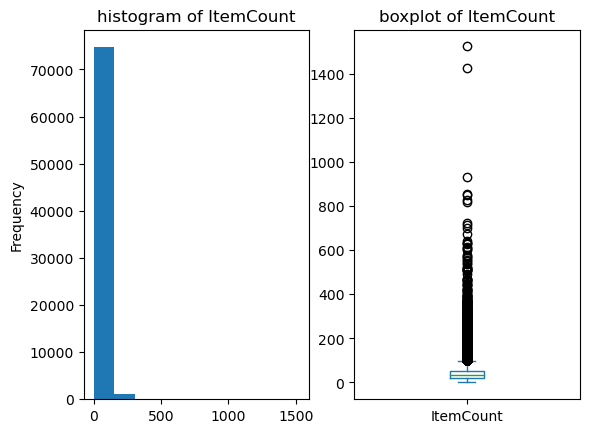

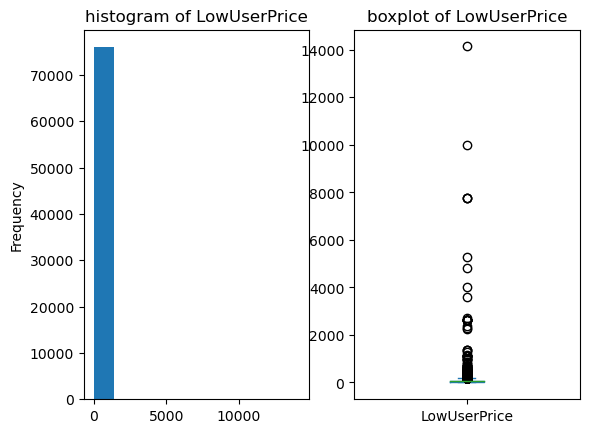

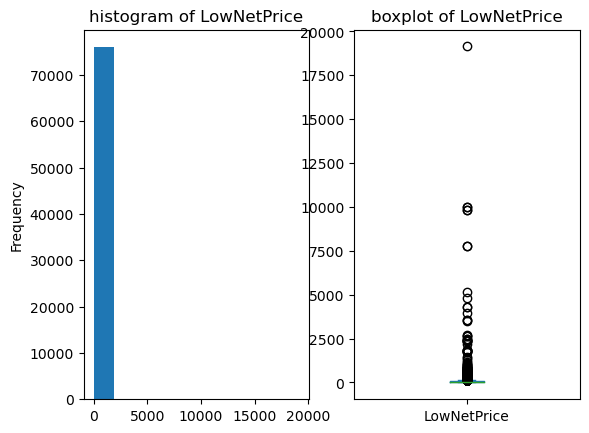

In [16]:
for i in numec_data : 
    _, ax = plt.subplots(1,2)
    train[i].plot(kind='hist',ax=ax[0])
    train[i].plot(kind='box',ax=ax[1])
    ax[0].set_title("histogram of "+i)
    ax[1].set_title("boxplot of "+i)
    plt.show()

In [17]:
release_years = list(map(str, range(1999,2015)))
train['ReleaseYear'] = train['ReleaseYear'].apply(lambda x: x if x in release_years else 'Other') 
train['ReleaseNumber'] = train['ReleaseNumber'].apply(lambda x:x if x >=0 and x<=14 else 15)

In [18]:
train = train[train['ItemCount']<800]
train = train[train['LowUserPrice']<6000]
train = train[train['LowNetPrice']<6000]
train = train[train['PriceReg']<2500]
train = train[train['SoldCount']<40]
train.shape

(75969, 14)

<AxesSubplot:ylabel='Frequency'>

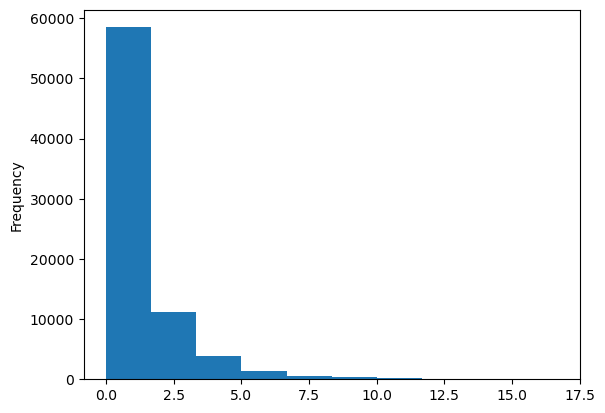

In [19]:
train['StrengthFactor'] = train['StrengthFactor']/(10**6)
train['StrengthFactor'].plot(kind='hist')

In [20]:
train = train[train['StrengthFactor']<=12]
train.shape

(75872, 14)

In [21]:
print (train.columns)
train.describe()

Index(['Order', 'File_Type', 'SKU_number', 'SoldFlag', 'SoldCount',
       'MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice'],
      dtype='object')


,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice
count,75872.00000,75872.00000,75872.000000,75872.000000,75872.000000,75872.000000,75872.000000,75872.000000,75872.000000
mean,0.17117,0.31963,4.046710,0.789277,1.206444,98.615850,43.792321,56.097397,46.187533
std,0.37666,1.08669,3.359598,0.407825,1.474281,75.676864,36.034055,68.618426,73.142707
min,0.00000,0.00000,0.000000,0.000000,0.000113,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.00000,2.000000,1.000000,0.244411,49.950000,22.000000,20.490000,18.740000
50%,0.00000,0.00000,3.000000,1.000000,0.714758,78.950000,34.000000,44.030000,36.105000
75%,0.00000,0.00000,6.000000,1.000000,1.548617,127.055000,53.000000,79.417500,56.870000
max,1.00000,36.00000,15.000000,1.000000,11.998140,2432.640000,721.000000,5272.400000,5132.240000


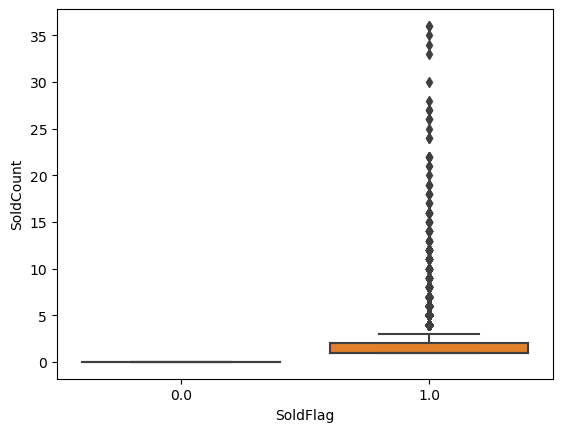

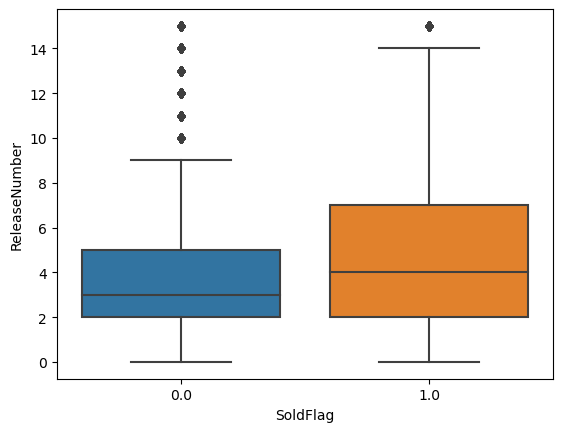

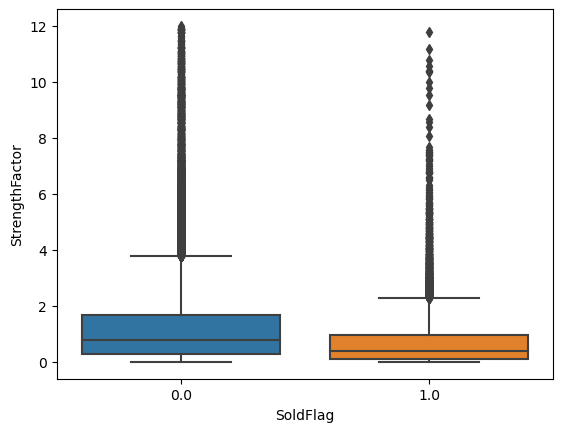

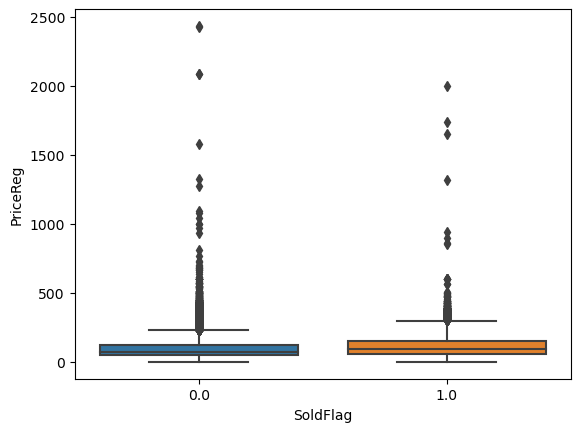

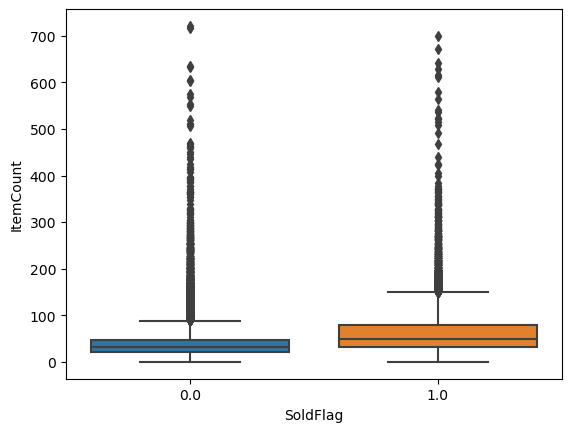

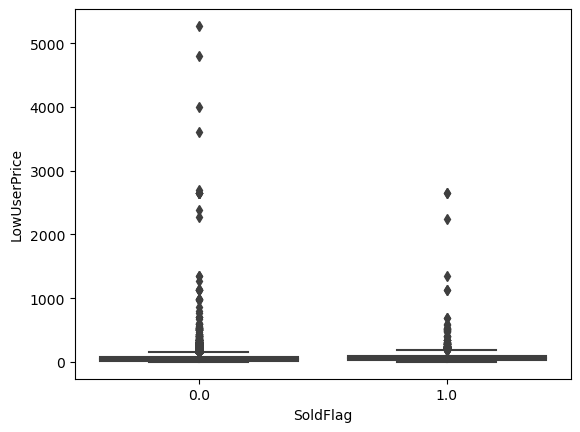

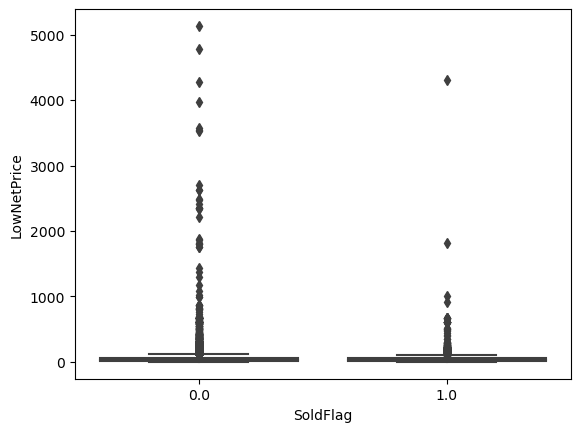

In [23]:
for i in numec_data :
    sns.boxplot(data=train, x=target, y=i)
    plt.xticks()
    plt.show()

In [24]:
train = train[train['LowNetPrice']<2000]
train = train[train['LowUserPrice']<2000]
print(train.shape)
train.columns

(75837, 14)


Index(['Order', 'File_Type', 'SKU_number', 'SoldFlag', 'SoldCount',
       'MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice'],
      dtype='object')

In [25]:
train['MarketingType'].value_counts()

S    40820
D    35017
Name: MarketingType, dtype: int64

In [26]:
train['MarketingType'] = train['MarketingType'].apply(lambda x:0 if x=='S' else 1)
temp = pd.get_dummies(train['ReleaseYear'],prefix='Year',drop_first=True)
train = pd.concat([train,temp],axis=1)
train.shape

(75837, 30)

In [27]:
target = 'SoldFlag'
cols = ['LowNetPrice', 'LowUserPrice', 'ItemCount', 'PriceReg','StrengthFactor','New_Release_Flag', 'MarketingType']
year_cols = ["Year_"+str(i) for i in range(2000,2015)]+['Year_Other']
cols = cols + year_cols

In [30]:
X = train[cols].copy()
y = train[target].copy()
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=36)
X_train.shape, X_test.shape


((60669, 23), (15168, 23))

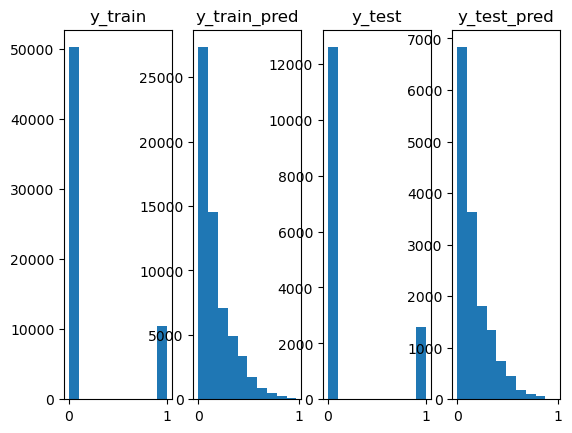

In [33]:
model = xgb.XGBClassifier(objective='binary:logistic')
model.fit(X_train,y_train,verbose=True)

y_train_pred = model.predict_proba(X_train)[:,1]
y_test_pred = model.predict_proba(X_test)[:,1]

_,ax = plt.subplots(1,4)
ax[0].hist(y_train)
ax[1].hist(y_train_pred)
ax[2].hist(y_test)
ax[3].hist(y_test_pred)
ax[0].set_title("y_train")
ax[1].set_title("y_train_pred")
ax[2].set_title("y_test")
ax[3].set_title("y_test_pred")
plt.show()

In [34]:
model = xgb.XGBClassifier(objective='binary:logistic')
model.fit(X_train,y_train,verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

C:\Users\manis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


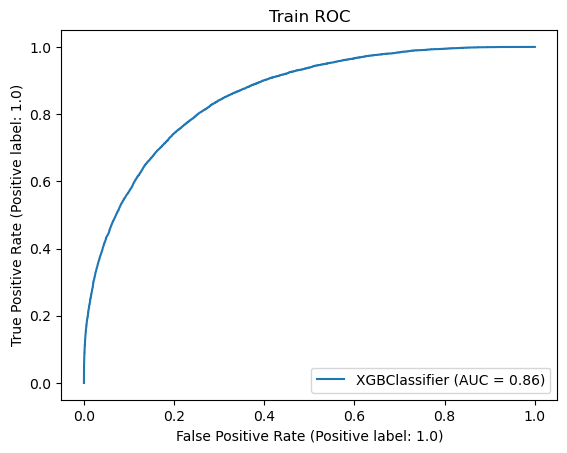

C:\Users\manis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


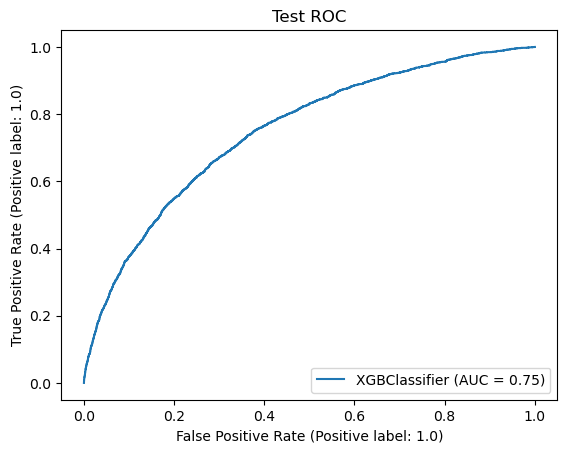

In [35]:
plot_roc_curve(model,X_train, y_train)
plt.title("Train ROC")
plt.show()
plot_roc_curve(model,X_test, y_test)
plt.title("Test ROC")
plt.show()

In [36]:
threhsold = 0.2
y_train_pred_class = [1 if i >= threhsold else 0 for i in y_train_pred]
y_test_pred_class = [1 if i >= threhsold else 0 for i in y_test_pred]

In [37]:
print ("Confusion matrix - Train predictions : ")
print (confusion_matrix(y_train, y_train_pred_class))
print ("Confusion matrix - Test predictions : ")
print (confusion_matrix(y_test, y_test_pred_class))

Confusion matrix - Train predictions : 
[[39810 10448]
 [ 2582  7829]]
Confusion matrix - Test predictions : 
[[9555 3041]
 [1022 1550]]
